<a href="https://colab.research.google.com/github/iqra0908/d3rlpy/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

Build a pipeline for offline RL using d3rlpy:
Hint: In this homework, you will implement a simple pipeline for
offline RL using the APIs provided in d3rlpy repository.

## [**Required**] Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different
dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include
different dataset sizes, task difficulties) plots.

##[**Optional**] Train OPE (FQE):
- Train OPE (FQE) to evaluate the trained policy.
- Generate estimated Q vs training steps (may include
different trained policies) plots.
- Include the true Q in the same plots

##[**Requirements**]:
- Build a pipeline for offline RL (data processing, training,
evaluation).
- Compare the true Q value with estimated Q value for both
offline RL training and offline evaluation (optional).

## Initial Setup

In [ ]:
!pip install git+"https://github.com/iqra0908/d3rlpy.git"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/iqra0908/d3rlpy.git to /tmp/pip-req-build-ikt7n9wc
  Running command git clone -q https://github.com/iqra0908/d3rlpy.git /tmp/pip-req-build-ikt7n9wc


In [ ]:
!pip install -e .[all]
!pip install gym[all]
!pip install -e .[docs,tests,extra] 
!pip install git+https://github.com/rail-berkeley/d4rl
!pip install git+https://github.com/takuseno/d4rl-atari
!pip install gym[atari]
!pip install --upgrade gym==0.19.0


ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14
    Running setup.py install for mujoco-py ... error
  Rolling back uninstall of mujoco-py
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py-2.1.2.14.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py-2.1.2.14.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, set

In [ ]:
import shutil

shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)

In [ ]:

from d3rlpy.algos.cql import DiscreteCQL
from d3rlpy.algos import CQL
from d3rlpy.dataset import MDPDataset
from d3rlpy.metrics import initial_state_value_estimation_scorer
from d3rlpy.metrics.scorer import average_value_estimation_scorer, true_q_scorer
from d3rlpy.datasets import get_atari, get_cartpole
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

dataset, env = get_cartpole()

train_episodes, test_episodes = train_test_split(dataset,test_size=0.2)

cql = DiscreteCQL(use_gpu=True)
dataset.episodes
result = cql.fit(train_episodes,
   eval_episodes=test_episodes,
   n_epochs=100,
   save_interval=10,
   scorers={
       "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer

   },
   with_timestamp=False,
   experiment_name=f"CQL_cartpole")

2022-11-03 23:25.01 [debug    ] RoundIterator is selected.
2022-11-03 23:25.01 [info     ] Directory is created at d3rlpy_logs/CQL_cartpole
2022-11-03 23:25.01 [debug    ] Building models...
2022-11-03 23:25.04 [debug    ] Models have been built.
2022-11-03 23:25.04 [info     ] Parameters are saved to d3rlpy_logs/CQL_cartpole/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': 0, 'algorithm': 'DiscreteCQL', 'observation_shape': (4,), 'action_size': 2

Epoch 1/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:25.21 [info     ] CQL_cartpole: epoch=1 step=2481 epoch=1 metrics={'time_sample_batch': 0.00015107338969527786, 'time_algorithm_update': 0.006040493935550811, 'loss': 0.6824755745758601, 'time_step': 0.006300655308869134, 'estimated_q': 1.000967264175415, 'true_q': 1.9571325778961182} step=2481


Epoch 2/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:25.37 [info     ] CQL_cartpole: epoch=2 step=4962 epoch=2 metrics={'time_sample_batch': 0.000145974922257054, 'time_algorithm_update': 0.005805493554296343, 'loss': 0.6653533954862527, 'time_step': 0.006059773935996828, 'estimated_q': 1.0054439306259155, 'true_q': 1.9396902322769165} step=4962


Epoch 3/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:25.53 [info     ] CQL_cartpole: epoch=3 step=7443 epoch=3 metrics={'time_sample_batch': 0.00014395119921904522, 'time_algorithm_update': 0.005655579968644265, 'loss': 0.6636232510779664, 'time_step': 0.00589845844547098, 'estimated_q': 1.0324105024337769, 'true_q': 1.9806541204452515} step=7443


Epoch 4/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:26.09 [info     ] CQL_cartpole: epoch=4 step=9924 epoch=4 metrics={'time_sample_batch': 0.00013438629940698725, 'time_algorithm_update': 0.00566660257560118, 'loss': 0.6730758313544573, 'time_step': 0.005900868097172299, 'estimated_q': 2.0368492603302, 'true_q': 2.8925681114196777} step=9924


Epoch 5/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:26.25 [info     ] CQL_cartpole: epoch=5 step=12405 epoch=5 metrics={'time_sample_batch': 0.00013627125725828798, 'time_algorithm_update': 0.005618791434131578, 'loss': 0.6716908601348028, 'time_step': 0.005855970640232466, 'estimated_q': 2.0410802364349365, 'true_q': 2.8876631259918213} step=12405


Epoch 6/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:26.41 [info     ] CQL_cartpole: epoch=6 step=14886 epoch=6 metrics={'time_sample_batch': 0.00013391003883543248, 'time_algorithm_update': 0.005750512846147567, 'loss': 0.6711496369870427, 'time_step': 0.005988362814716061, 'estimated_q': 2.045569658279419, 'true_q': 2.897392511367798} step=14886


Epoch 7/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:26.58 [info     ] CQL_cartpole: epoch=7 step=17367 epoch=7 metrics={'time_sample_batch': 0.00014744271966825805, 'time_algorithm_update': 0.005902090268671297, 'loss': 0.6820157345674154, 'time_step': 0.006160442793575903, 'estimated_q': 3.067596912384033, 'true_q': 3.8389477729797363} step=17367


Epoch 8/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:27.22 [info     ] CQL_cartpole: epoch=8 step=19848 epoch=8 metrics={'time_sample_batch': 0.00023003135751880306, 'time_algorithm_update': 0.008350989646557982, 'loss': 0.6857980903191511, 'time_step': 0.008735672306120755, 'estimated_q': 3.0714356899261475, 'true_q': 3.845855236053467} step=19848


Epoch 9/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:27.41 [info     ] CQL_cartpole: epoch=9 step=22329 epoch=9 metrics={'time_sample_batch': 0.0001756826844344164, 'time_algorithm_update': 0.006954113450179125, 'loss': 0.685241694293739, 'time_step': 0.007262317368408597, 'estimated_q': 3.0509233474731445, 'true_q': 3.8081581592559814} step=22329


Epoch 10/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:27.57 [info     ] CQL_cartpole: epoch=10 step=24810 epoch=10 metrics={'time_sample_batch': 0.00014306738798486662, 'time_algorithm_update': 0.005755777658833846, 'loss': 0.6915000758551628, 'time_step': 0.006007237859139371, 'estimated_q': 4.079111576080322, 'true_q': 4.739602088928223} step=24810
2022-11-03 23:27.57 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_24810.pt


Epoch 11/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:28.14 [info     ] CQL_cartpole: epoch=11 step=27291 epoch=11 metrics={'time_sample_batch': 0.00014581318970218583, 'time_algorithm_update': 0.0058430750876460906, 'loss': 0.6977315623161534, 'time_step': 0.006101571470919467, 'estimated_q': 4.102601528167725, 'true_q': 4.739782810211182} step=27291


Epoch 12/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:28.30 [info     ] CQL_cartpole: epoch=12 step=29772 epoch=12 metrics={'time_sample_batch': 0.0001521653487095185, 'time_algorithm_update': 0.0057846412020602185, 'loss': 0.6970585473647574, 'time_step': 0.006043584151692758, 'estimated_q': 4.062530040740967, 'true_q': 4.7330241203308105} step=29772


Epoch 13/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:28.46 [info     ] CQL_cartpole: epoch=13 step=32253 epoch=13 metrics={'time_sample_batch': 0.00014791648169766987, 'time_algorithm_update': 0.005756614766549506, 'loss': 0.7000285977319766, 'time_step': 0.006011885628014118, 'estimated_q': 5.109419822692871, 'true_q': 5.705451011657715} step=32253


Epoch 14/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:29.03 [info     ] CQL_cartpole: epoch=14 step=34734 epoch=14 metrics={'time_sample_batch': 0.00014030957404570634, 'time_algorithm_update': 0.005804487218399386, 'loss': 0.7095649564568913, 'time_step': 0.006054960782851773, 'estimated_q': 5.1097869873046875, 'true_q': 5.711255073547363} step=34734


Epoch 15/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:29.19 [info     ] CQL_cartpole: epoch=15 step=37215 epoch=15 metrics={'time_sample_batch': 0.00014537344628502794, 'time_algorithm_update': 0.0058291300512619045, 'loss': 0.708852512588524, 'time_step': 0.006085174595910856, 'estimated_q': 5.070885181427002, 'true_q': 5.664248943328857} step=37215


Epoch 16/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:29.35 [info     ] CQL_cartpole: epoch=16 step=39696 epoch=16 metrics={'time_sample_batch': 0.00014074451257412783, 'time_algorithm_update': 0.005797447383716096, 'loss': 0.7084697809540327, 'time_step': 0.006048664264456008, 'estimated_q': 5.086397171020508, 'true_q': 5.660164833068848} step=39696


Epoch 17/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:29.53 [info     ] CQL_cartpole: epoch=17 step=42177 epoch=17 metrics={'time_sample_batch': 0.00017406977938337222, 'time_algorithm_update': 0.006194044341487492, 'loss': 0.7203861234025675, 'time_step': 0.006494686325823573, 'estimated_q': 6.1118974685668945, 'true_q': 6.628897666931152} step=42177


Epoch 18/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:30.11 [info     ] CQL_cartpole: epoch=18 step=44658 epoch=18 metrics={'time_sample_batch': 0.0001665240860139108, 'time_algorithm_update': 0.0061231993321976515, 'loss': 0.71920270328318, 'time_step': 0.006413343980013484, 'estimated_q': 6.129783630371094, 'true_q': 6.6174845695495605} step=44658


Epoch 19/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:30.29 [info     ] CQL_cartpole: epoch=19 step=47139 epoch=19 metrics={'time_sample_batch': 0.00017194592246409627, 'time_algorithm_update': 0.006639548147555947, 'loss': 0.7186262690939282, 'time_step': 0.006951738970263357, 'estimated_q': 6.141664028167725, 'true_q': 6.655086517333984} step=47139


Epoch 20/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:30.48 [info     ] CQL_cartpole: epoch=20 step=49620 epoch=20 metrics={'time_sample_batch': 0.0001782646394458234, 'time_algorithm_update': 0.006265199554394157, 'loss': 0.7284380454106083, 'time_step': 0.006572723773062974, 'estimated_q': 7.101157188415527, 'true_q': 7.535712718963623} step=49620
2022-11-03 23:30.48 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_49620.pt


Epoch 21/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:31.08 [info     ] CQL_cartpole: epoch=21 step=52101 epoch=21 metrics={'time_sample_batch': 0.00021707391796550266, 'time_algorithm_update': 0.007004866048435394, 'loss': 0.7306884166599521, 'time_step': 0.007374897064676404, 'estimated_q': 7.110966205596924, 'true_q': 7.537414073944092} step=52101


Epoch 22/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:31.24 [info     ] CQL_cartpole: epoch=22 step=54582 epoch=22 metrics={'time_sample_batch': 0.00015479054771955336, 'time_algorithm_update': 0.005898062714834648, 'loss': 0.7299717897034999, 'time_step': 0.006168079875929132, 'estimated_q': 7.118007183074951, 'true_q': 7.54001522064209} step=54582


Epoch 23/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:31.40 [info     ] CQL_cartpole: epoch=23 step=57063 epoch=23 metrics={'time_sample_batch': 0.00015045692247039414, 'time_algorithm_update': 0.0058255568477041724, 'loss': 0.7361337656890227, 'time_step': 0.006091900286968559, 'estimated_q': 8.094122886657715, 'true_q': 8.44883918762207} step=57063


Epoch 24/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:31.57 [info     ] CQL_cartpole: epoch=24 step=59544 epoch=24 metrics={'time_sample_batch': 0.00014856610265483495, 'time_algorithm_update': 0.00591449437723771, 'loss': 0.7401143449153308, 'time_step': 0.006181692894501631, 'estimated_q': 8.153921127319336, 'true_q': 8.509637832641602} step=59544


Epoch 25/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:32.13 [info     ] CQL_cartpole: epoch=25 step=62025 epoch=25 metrics={'time_sample_batch': 0.00014838178712290557, 'time_algorithm_update': 0.005796926822070391, 'loss': 0.7392205842220702, 'time_step': 0.006062511185012196, 'estimated_q': 8.084426879882812, 'true_q': 8.441197395324707} step=62025


Epoch 26/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:32.32 [info     ] CQL_cartpole: epoch=26 step=64506 epoch=26 metrics={'time_sample_batch': 0.00021135043060044423, 'time_algorithm_update': 0.00662038317614628, 'loss': 0.7426102082607295, 'time_step': 0.00697883892712791, 'estimated_q': 9.081998825073242, 'true_q': 9.346833229064941} step=64506


Epoch 27/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:32.49 [info     ] CQL_cartpole: epoch=27 step=66987 epoch=27 metrics={'time_sample_batch': 0.00015368330915913088, 'time_algorithm_update': 0.006018923829035238, 'loss': 0.7503284341094476, 'time_step': 0.006298584786214832, 'estimated_q': 9.071293830871582, 'true_q': 9.337584495544434} step=66987


Epoch 28/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:33.07 [info     ] CQL_cartpole: epoch=28 step=69468 epoch=28 metrics={'time_sample_batch': 0.00015157521227491042, 'time_algorithm_update': 0.006354642654320541, 'loss': 0.749148839642472, 'time_step': 0.006647594894722842, 'estimated_q': 9.062725067138672, 'true_q': 9.334382057189941} step=69468


Epoch 29/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:33.24 [info     ] CQL_cartpole: epoch=29 step=71949 epoch=29 metrics={'time_sample_batch': 0.00014796087886959446, 'time_algorithm_update': 0.005863541415121132, 'loss': 0.7486847268146452, 'time_step': 0.006126385646114326, 'estimated_q': 9.095385551452637, 'true_q': 9.375032424926758} step=71949


Epoch 30/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:33.41 [info     ] CQL_cartpole: epoch=30 step=74430 epoch=30 metrics={'time_sample_batch': 0.00015575037229354226, 'time_algorithm_update': 0.006239434203425034, 'loss': 0.7619617143642129, 'time_step': 0.0065236368375360745, 'estimated_q': 10.097333908081055, 'true_q': 10.300597190856934} step=74430
2022-11-03 23:33.41 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_74430.pt


Epoch 31/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:33.59 [info     ] CQL_cartpole: epoch=31 step=76911 epoch=31 metrics={'time_sample_batch': 0.00016068989401236508, 'time_algorithm_update': 0.006203533131861966, 'loss': 0.7597566346687831, 'time_step': 0.006493909279217118, 'estimated_q': 10.055078506469727, 'true_q': 10.262202262878418} step=76911


Epoch 32/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:34.16 [info     ] CQL_cartpole: epoch=32 step=79392 epoch=32 metrics={'time_sample_batch': 0.00015704288736364142, 'time_algorithm_update': 0.00621347454275541, 'loss': 0.7587573301499047, 'time_step': 0.006501454876488805, 'estimated_q': 10.0895414352417, 'true_q': 10.288580894470215} step=79392


Epoch 33/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:34.39 [info     ] CQL_cartpole: epoch=33 step=81873 epoch=33 metrics={'time_sample_batch': 0.00029612308257724525, 'time_algorithm_update': 0.008016421399929504, 'loss': 0.7687176111147126, 'time_step': 0.008488401488304523, 'estimated_q': 11.031744003295898, 'true_q': 11.135873794555664} step=81873


Epoch 34/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:34.59 [info     ] CQL_cartpole: epoch=34 step=84354 epoch=34 metrics={'time_sample_batch': 0.00024209460727825418, 'time_algorithm_update': 0.006861646825966457, 'loss': 0.769177511592682, 'time_step': 0.007259343718867396, 'estimated_q': 11.051697731018066, 'true_q': 11.167275428771973} step=84354


Epoch 35/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:35.16 [info     ] CQL_cartpole: epoch=35 step=86835 epoch=35 metrics={'time_sample_batch': 0.00013410434853593364, 'time_algorithm_update': 0.006062997631947872, 'loss': 0.7681192919305619, 'time_step': 0.006324472277455635, 'estimated_q': 11.028298377990723, 'true_q': 11.140046119689941} step=86835


Epoch 36/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:35.35 [info     ] CQL_cartpole: epoch=36 step=89316 epoch=36 metrics={'time_sample_batch': 0.00016931101757881382, 'time_algorithm_update': 0.006838600369337728, 'loss': 0.7745047082635771, 'time_step': 0.00718785965937561, 'estimated_q': 11.987942695617676, 'true_q': 12.0007905960083} step=89316


Epoch 37/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:35.52 [info     ] CQL_cartpole: epoch=37 step=91797 epoch=37 metrics={'time_sample_batch': 0.0001540131167219993, 'time_algorithm_update': 0.006086354196095649, 'loss': 0.7778708747393275, 'time_step': 0.006371371354945289, 'estimated_q': 12.032150268554688, 'true_q': 12.070481300354004} step=91797


Epoch 38/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:36.15 [info     ] CQL_cartpole: epoch=38 step=94278 epoch=38 metrics={'time_sample_batch': 0.0002560741427635676, 'time_algorithm_update': 0.007801169880163953, 'loss': 0.7763946372287401, 'time_step': 0.008249607839588195, 'estimated_q': 11.95256519317627, 'true_q': 11.958693504333496} step=94278


Epoch 39/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:36.35 [info     ] CQL_cartpole: epoch=39 step=96759 epoch=39 metrics={'time_sample_batch': 0.00020149003013109594, 'time_algorithm_update': 0.00730292550117342, 'loss': 0.7804724468621742, 'time_step': 0.007666654521445505, 'estimated_q': 12.874258041381836, 'true_q': 12.83348274230957} step=96759


Epoch 40/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:36.53 [info     ] CQL_cartpole: epoch=40 step=99240 epoch=40 metrics={'time_sample_batch': 0.0001647897133756097, 'time_algorithm_update': 0.006348857087793008, 'loss': 0.7862197439644616, 'time_step': 0.006653368256832985, 'estimated_q': 12.908435821533203, 'true_q': 12.860892295837402} step=99240
2022-11-03 23:36.53 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_99240.pt


Epoch 41/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:37.10 [info     ] CQL_cartpole: epoch=41 step=101721 epoch=41 metrics={'time_sample_batch': 0.00016686004383436185, 'time_algorithm_update': 0.005906542190281147, 'loss': 0.7848463937045586, 'time_step': 0.006202691699746442, 'estimated_q': 12.897441864013672, 'true_q': 12.855039596557617} step=101721


Epoch 42/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:37.27 [info     ] CQL_cartpole: epoch=42 step=104202 epoch=42 metrics={'time_sample_batch': 0.00015333745326788278, 'time_algorithm_update': 0.005908120788426612, 'loss': 0.7863606494768451, 'time_step': 0.006186187003034587, 'estimated_q': 13.777846336364746, 'true_q': 13.666773796081543} step=104202


Epoch 43/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:37.53 [info     ] CQL_cartpole: epoch=43 step=106683 epoch=43 metrics={'time_sample_batch': 0.00031140829852779563, 'time_algorithm_update': 0.009017874088464174, 'loss': 0.7937633399879774, 'time_step': 0.009564092782945798, 'estimated_q': 13.837536811828613, 'true_q': 13.725014686584473} step=106683


Epoch 44/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:38.09 [info     ] CQL_cartpole: epoch=44 step=109164 epoch=44 metrics={'time_sample_batch': 0.00014900286704097625, 'time_algorithm_update': 0.005881290001429074, 'loss': 0.7926231631825211, 'time_step': 0.006156125216655124, 'estimated_q': 13.819158554077148, 'true_q': 13.677628517150879} step=109164


Epoch 45/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:38.31 [info     ] CQL_cartpole: epoch=45 step=111645 epoch=45 metrics={'time_sample_batch': 0.0002746010249490365, 'time_algorithm_update': 0.007506849111351742, 'loss': 0.7914899077352042, 'time_step': 0.007974061885220252, 'estimated_q': 13.823317527770996, 'true_q': 13.707735061645508} step=111645


Epoch 46/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:38.50 [info     ] CQL_cartpole: epoch=46 step=114126 epoch=46 metrics={'time_sample_batch': 0.00022321370089068522, 'time_algorithm_update': 0.006524522570725748, 'loss': 0.8021110155946638, 'time_step': 0.0068927904810938126, 'estimated_q': 14.713216781616211, 'true_q': 14.503934860229492} step=114126


Epoch 47/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:39.07 [info     ] CQL_cartpole: epoch=47 step=116607 epoch=47 metrics={'time_sample_batch': 0.00016499247968028698, 'time_algorithm_update': 0.006027582526831605, 'loss': 0.8012090503857147, 'time_step': 0.006328443229702969, 'estimated_q': 14.71381664276123, 'true_q': 14.525888442993164} step=116607


Epoch 48/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:39.24 [info     ] CQL_cartpole: epoch=48 step=119088 epoch=48 metrics={'time_sample_batch': 0.00016743432413613975, 'time_algorithm_update': 0.0061185215808171895, 'loss': 0.8003126279522651, 'time_step': 0.0064158756758887076, 'estimated_q': 14.719596862792969, 'true_q': 14.518272399902344} step=119088


Epoch 49/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:39.40 [info     ] CQL_cartpole: epoch=49 step=121569 epoch=49 metrics={'time_sample_batch': 0.00015413400772260784, 'time_algorithm_update': 0.005902952650101711, 'loss': 0.8073037801515378, 'time_step': 0.006187702080550957, 'estimated_q': 15.673965454101562, 'true_q': 15.409562110900879} step=121569


Epoch 50/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:39.57 [info     ] CQL_cartpole: epoch=50 step=124050 epoch=50 metrics={'time_sample_batch': 0.00017318375790037488, 'time_algorithm_update': 0.006034544234024042, 'loss': 0.8088102330127487, 'time_step': 0.006342120345491212, 'estimated_q': 15.704164505004883, 'true_q': 15.436117172241211} step=124050
2022-11-03 23:39.57 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_124050.pt


Epoch 51/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:40.16 [info     ] CQL_cartpole: epoch=51 step=126531 epoch=51 metrics={'time_sample_batch': 0.00016862901167156522, 'time_algorithm_update': 0.006558955652682064, 'loss': 0.8078421970280559, 'time_step': 0.006877004211345828, 'estimated_q': 15.703873634338379, 'true_q': 15.42598819732666} step=126531


Epoch 52/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:40.33 [info     ] CQL_cartpole: epoch=52 step=129012 epoch=52 metrics={'time_sample_batch': 0.0001596477136454338, 'time_algorithm_update': 0.00603164006317397, 'loss': 0.8130299671433329, 'time_step': 0.006328094586976254, 'estimated_q': 16.59241485595703, 'true_q': 16.25521469116211} step=129012


Epoch 53/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:40.51 [info     ] CQL_cartpole: epoch=53 step=131493 epoch=53 metrics={'time_sample_batch': 0.00015807737990859437, 'time_algorithm_update': 0.005950294738332863, 'loss': 0.8177340831885362, 'time_step': 0.006239190595566098, 'estimated_q': 16.582155227661133, 'true_q': 16.232576370239258} step=131493


Epoch 54/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:41.09 [info     ] CQL_cartpole: epoch=54 step=133974 epoch=54 metrics={'time_sample_batch': 0.00020366558765317586, 'time_algorithm_update': 0.0066185554925687175, 'loss': 0.816376899685508, 'time_step': 0.0069807418552630856, 'estimated_q': 16.6520938873291, 'true_q': 16.310522079467773} step=133974


Epoch 55/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:41.26 [info     ] CQL_cartpole: epoch=55 step=136455 epoch=55 metrics={'time_sample_batch': 0.0001571340841518588, 'time_algorithm_update': 0.005983541301064605, 'loss': 0.8189546193436527, 'time_step': 0.006273782719339588, 'estimated_q': 17.519794464111328, 'true_q': 17.101720809936523} step=136455


Epoch 56/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:41.43 [info     ] CQL_cartpole: epoch=56 step=138936 epoch=56 metrics={'time_sample_batch': 0.00015997310071066474, 'time_algorithm_update': 0.005965880355927215, 'loss': 0.8279731437738074, 'time_step': 0.006258206231033836, 'estimated_q': 17.50607681274414, 'true_q': 17.07023048400879} step=138936


Epoch 57/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:42.00 [info     ] CQL_cartpole: epoch=57 step=141417 epoch=57 metrics={'time_sample_batch': 0.00015732051383483223, 'time_algorithm_update': 0.005968943376398913, 'loss': 0.8266735869350572, 'time_step': 0.006252716261261368, 'estimated_q': 17.530433654785156, 'true_q': 17.112138748168945} step=141417


Epoch 58/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:42.23 [info     ] CQL_cartpole: epoch=58 step=143898 epoch=58 metrics={'time_sample_batch': 0.00020670544856116446, 'time_algorithm_update': 0.008236155496495041, 'loss': 0.8255553951863078, 'time_step': 0.008670548573947154, 'estimated_q': 17.500675201416016, 'true_q': 17.04795265197754} step=143898


Epoch 59/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:42.40 [info     ] CQL_cartpole: epoch=59 step=146379 epoch=59 metrics={'time_sample_batch': 0.0001533694538268674, 'time_algorithm_update': 0.005882247423558694, 'loss': 0.8384719649806517, 'time_step': 0.006171565438316312, 'estimated_q': 18.40304946899414, 'true_q': 17.884754180908203} step=146379


Epoch 60/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:42.59 [info     ] CQL_cartpole: epoch=60 step=148860 epoch=60 metrics={'time_sample_batch': 0.0002093968589379873, 'time_algorithm_update': 0.006703836405676058, 'loss': 0.836606430303469, 'time_step': 0.0070793021354690665, 'estimated_q': 18.375307083129883, 'true_q': 17.87466049194336} step=148860
2022-11-03 23:42.59 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_148860.pt


Epoch 61/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:43.16 [info     ] CQL_cartpole: epoch=61 step=151341 epoch=61 metrics={'time_sample_batch': 0.00016742500265199106, 'time_algorithm_update': 0.005990997623503569, 'loss': 0.8355822371456326, 'time_step': 0.006294277587853723, 'estimated_q': 18.40721893310547, 'true_q': 17.90542221069336} step=151341


Epoch 62/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:43.35 [info     ] CQL_cartpole: epoch=62 step=153822 epoch=62 metrics={'time_sample_batch': 0.00020719958331881874, 'time_algorithm_update': 0.006798992902701154, 'loss': 0.8466667931846725, 'time_step': 0.007179069307627865, 'estimated_q': 19.29410171508789, 'true_q': 18.706274032592773} step=153822


Epoch 63/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:43.52 [info     ] CQL_cartpole: epoch=63 step=156303 epoch=63 metrics={'time_sample_batch': 0.00015798051335166798, 'time_algorithm_update': 0.0060018164070802845, 'loss': 0.8488271237500777, 'time_step': 0.006293904536292227, 'estimated_q': 19.355003356933594, 'true_q': 18.78775978088379} step=156303


Epoch 64/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:44.09 [info     ] CQL_cartpole: epoch=64 step=158784 epoch=64 metrics={'time_sample_batch': 0.00016214933091716774, 'time_algorithm_update': 0.006070823738623991, 'loss': 0.8475207503478117, 'time_step': 0.006373019912270758, 'estimated_q': 19.284215927124023, 'true_q': 18.702438354492188} step=158784


Epoch 65/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:44.26 [info     ] CQL_cartpole: epoch=65 step=161265 epoch=65 metrics={'time_sample_batch': 0.0001598203052488463, 'time_algorithm_update': 0.005987603257904606, 'loss': 0.8556797004356254, 'time_step': 0.006281545305386612, 'estimated_q': 20.16071128845215, 'true_q': 19.514598846435547} step=161265


Epoch 66/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:44.43 [info     ] CQL_cartpole: epoch=66 step=163746 epoch=66 metrics={'time_sample_batch': 0.00016359550632905786, 'time_algorithm_update': 0.006016715502171976, 'loss': 0.8607172284309829, 'time_step': 0.006321892628790822, 'estimated_q': 20.179296493530273, 'true_q': 19.533939361572266} step=163746


Epoch 67/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:45.00 [info     ] CQL_cartpole: epoch=67 step=166227 epoch=67 metrics={'time_sample_batch': 0.00016104170796564634, 'time_algorithm_update': 0.0061073981672945836, 'loss': 0.8594585151044845, 'time_step': 0.006406202762177854, 'estimated_q': 20.162479400634766, 'true_q': 19.49638557434082} step=166227


Epoch 68/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:45.17 [info     ] CQL_cartpole: epoch=68 step=168708 epoch=68 metrics={'time_sample_batch': 0.00016241119735330308, 'time_algorithm_update': 0.006037383923267271, 'loss': 0.8629159233662352, 'time_step': 0.006338352159548555, 'estimated_q': 21.085277557373047, 'true_q': 20.375120162963867} step=168708


Epoch 69/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:45.34 [info     ] CQL_cartpole: epoch=69 step=171189 epoch=69 metrics={'time_sample_batch': 0.00013743634667909708, 'time_algorithm_update': 0.006045776045836541, 'loss': 0.8721067269499001, 'time_step': 0.006323046859163087, 'estimated_q': 21.135257720947266, 'true_q': 20.423839569091797} step=171189


Epoch 70/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:45.51 [info     ] CQL_cartpole: epoch=70 step=173670 epoch=70 metrics={'time_sample_batch': 0.00016111176324342346, 'time_algorithm_update': 0.0060399556919145565, 'loss': 0.8707445443565449, 'time_step': 0.006344179720803645, 'estimated_q': 21.124107360839844, 'true_q': 20.408275604248047} step=173670
2022-11-03 23:45.51 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_173670.pt


Epoch 71/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:46.10 [info     ] CQL_cartpole: epoch=71 step=176151 epoch=71 metrics={'time_sample_batch': 0.0002443487727800621, 'time_algorithm_update': 0.006813650311889402, 'loss': 0.8717612533355998, 'time_step': 0.007228986239635094, 'estimated_q': 21.89592933654785, 'true_q': 21.122419357299805} step=176151


Epoch 72/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:46.32 [info     ] CQL_cartpole: epoch=72 step=178632 epoch=72 metrics={'time_sample_batch': 0.00025791528002959207, 'time_algorithm_update': 0.007320094906193073, 'loss': 0.885762033456278, 'time_step': 0.0077753360114814485, 'estimated_q': 21.831083297729492, 'true_q': 21.05314064025879} step=178632


Epoch 73/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:46.52 [info     ] CQL_cartpole: epoch=73 step=181113 epoch=73 metrics={'time_sample_batch': 0.00027490286805945894, 'time_algorithm_update': 0.006934490284579552, 'loss': 0.8845158134170811, 'time_step': 0.00736952241223361, 'estimated_q': 21.92613983154297, 'true_q': 21.1494140625} step=181113


Epoch 74/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:47.09 [info     ] CQL_cartpole: epoch=74 step=183594 epoch=74 metrics={'time_sample_batch': 0.0001666439199389973, 'time_algorithm_update': 0.006103672072177258, 'loss': 0.8835221691412197, 'time_step': 0.006418937062698235, 'estimated_q': 21.884929656982422, 'true_q': 21.11676597595215} step=183594


Epoch 75/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:47.26 [info     ] CQL_cartpole: epoch=75 step=186075 epoch=75 metrics={'time_sample_batch': 0.00016759817084205193, 'time_algorithm_update': 0.006006642437327153, 'loss': 0.8970427698471142, 'time_step': 0.006317404766613223, 'estimated_q': 22.698230743408203, 'true_q': 21.868799209594727} step=186075


Epoch 76/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:47.43 [info     ] CQL_cartpole: epoch=76 step=188556 epoch=76 metrics={'time_sample_batch': 0.00016056467861189376, 'time_algorithm_update': 0.0060528095380667, 'loss': 0.8980951846030296, 'time_step': 0.006351909729705035, 'estimated_q': 22.685096740722656, 'true_q': 21.8598690032959} step=188556


Epoch 77/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:47.59 [info     ] CQL_cartpole: epoch=77 step=191037 epoch=77 metrics={'time_sample_batch': 0.00016035518546298548, 'time_algorithm_update': 0.00593894905065731, 'loss': 0.8969858413932306, 'time_step': 0.0062362514451260245, 'estimated_q': 22.64988899230957, 'true_q': 21.818410873413086} step=191037


Epoch 78/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:48.16 [info     ] CQL_cartpole: epoch=78 step=193518 epoch=78 metrics={'time_sample_batch': 0.0001600921658535534, 'time_algorithm_update': 0.006025042278254431, 'loss': 0.9052809682621777, 'time_step': 0.006321169973524863, 'estimated_q': 23.46095085144043, 'true_q': 22.557065963745117} step=193518


Epoch 79/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:48.33 [info     ] CQL_cartpole: epoch=79 step=195999 epoch=79 metrics={'time_sample_batch': 0.00016589551046941129, 'time_algorithm_update': 0.0060060565291946335, 'loss': 0.9084263635782022, 'time_step': 0.0063153919987215335, 'estimated_q': 23.421062469482422, 'true_q': 22.53414535522461} step=195999


Epoch 80/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:48.52 [info     ] CQL_cartpole: epoch=80 step=198480 epoch=80 metrics={'time_sample_batch': 0.000235684213019436, 'time_algorithm_update': 0.006688305275519977, 'loss': 0.9074687554153018, 'time_step': 0.0070871784051835945, 'estimated_q': 23.42256736755371, 'true_q': 22.534137725830078} step=198480
2022-11-03 23:48.52 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_198480.pt


Epoch 81/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:49.12 [info     ] CQL_cartpole: epoch=81 step=200961 epoch=81 metrics={'time_sample_batch': 0.0002352542715753004, 'time_algorithm_update': 0.006953482087799158, 'loss': 0.9133219618631053, 'time_step': 0.007371786668001765, 'estimated_q': 24.260711669921875, 'true_q': 23.26962661743164} step=200961


Epoch 82/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:49.29 [info     ] CQL_cartpole: epoch=82 step=203442 epoch=82 metrics={'time_sample_batch': 0.00016457041825367915, 'time_algorithm_update': 0.006029988142426386, 'loss': 0.9201538948847469, 'time_step': 0.006338681198329226, 'estimated_q': 24.29462242126465, 'true_q': 23.322019577026367} step=203442


Epoch 83/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:49.46 [info     ] CQL_cartpole: epoch=83 step=205923 epoch=83 metrics={'time_sample_batch': 0.0001722232606419629, 'time_algorithm_update': 0.006110993857731602, 'loss': 0.9189721565845271, 'time_step': 0.0064236066457678456, 'estimated_q': 24.31321907043457, 'true_q': 23.342618942260742} step=205923


Epoch 84/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:50.04 [info     ] CQL_cartpole: epoch=84 step=208404 epoch=84 metrics={'time_sample_batch': 0.00017020799420813023, 'time_algorithm_update': 0.0061332198315596975, 'loss': 0.9210375559781646, 'time_step': 0.006449288007281856, 'estimated_q': 25.040525436401367, 'true_q': 23.9863338470459} step=208404


Epoch 85/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:50.26 [info     ] CQL_cartpole: epoch=85 step=210885 epoch=85 metrics={'time_sample_batch': 0.00025407300270262, 'time_algorithm_update': 0.007734150234992732, 'loss': 0.9303990586757276, 'time_step': 0.00820853267163819, 'estimated_q': 25.064729690551758, 'true_q': 24.023481369018555} step=210885


Epoch 86/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:50.43 [info     ] CQL_cartpole: epoch=86 step=213366 epoch=86 metrics={'time_sample_batch': 0.0001381615004871988, 'time_algorithm_update': 0.0062364789085588065, 'loss': 0.9290158942383847, 'time_step': 0.006519116398212843, 'estimated_q': 25.116743087768555, 'true_q': 24.081777572631836} step=213366


Epoch 87/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:51.00 [info     ] CQL_cartpole: epoch=87 step=215847 epoch=87 metrics={'time_sample_batch': 0.00016598641896430449, 'time_algorithm_update': 0.006139600723801674, 'loss': 0.9281820574387193, 'time_step': 0.006455102787532906, 'estimated_q': 25.1149959564209, 'true_q': 24.083866119384766} step=215847


Epoch 88/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:51.20 [info     ] CQL_cartpole: epoch=88 step=218328 epoch=88 metrics={'time_sample_batch': 0.00022294626078361564, 'time_algorithm_update': 0.006952166989751998, 'loss': 0.9409667735064237, 'time_step': 0.007362464318973121, 'estimated_q': 25.852758407592773, 'true_q': 24.738298416137695} step=218328


Epoch 89/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:51.40 [info     ] CQL_cartpole: epoch=89 step=220809 epoch=89 metrics={'time_sample_batch': 0.00021803604888608502, 'time_algorithm_update': 0.006688186498670413, 'loss': 0.9399733156121964, 'time_step': 0.00708298123877455, 'estimated_q': 25.90288543701172, 'true_q': 24.802751541137695} step=220809


Epoch 90/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:51.57 [info     ] CQL_cartpole: epoch=90 step=223290 epoch=90 metrics={'time_sample_batch': 0.00017149570438949297, 'time_algorithm_update': 0.006129006328528949, 'loss': 0.9395623247453351, 'time_step': 0.006445925546144104, 'estimated_q': 25.902891159057617, 'true_q': 24.805526733398438} step=223290
2022-11-03 23:51.57 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_223290.pt


Epoch 91/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:52.14 [info     ] CQL_cartpole: epoch=91 step=225771 epoch=91 metrics={'time_sample_batch': 0.00017334923826845745, 'time_algorithm_update': 0.006111057378360697, 'loss': 0.9491358523837793, 'time_step': 0.006433049885797097, 'estimated_q': 26.734529495239258, 'true_q': 25.563186645507812} step=225771


Epoch 92/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:52.32 [info     ] CQL_cartpole: epoch=92 step=228252 epoch=92 metrics={'time_sample_batch': 0.00017204173194550066, 'time_algorithm_update': 0.006160419249621095, 'loss': 0.9510888655139572, 'time_step': 0.006479458864635635, 'estimated_q': 26.73004913330078, 'true_q': 25.560190200805664} step=228252


Epoch 93/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:52.49 [info     ] CQL_cartpole: epoch=93 step=230733 epoch=93 metrics={'time_sample_batch': 0.0001709867705745305, 'time_algorithm_update': 0.006147737226290167, 'loss': 0.9498272702992804, 'time_step': 0.00646194860080902, 'estimated_q': 26.755218505859375, 'true_q': 25.58363151550293} step=230733


Epoch 94/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:53.07 [info     ] CQL_cartpole: epoch=94 step=233214 epoch=94 metrics={'time_sample_batch': 0.00016954232492258548, 'time_algorithm_update': 0.006207011390818266, 'loss': 0.956824757792401, 'time_step': 0.006522197292870641, 'estimated_q': 27.454557418823242, 'true_q': 26.20159339904785} step=233214


Epoch 95/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:53.24 [info     ] CQL_cartpole: epoch=95 step=235695 epoch=95 metrics={'time_sample_batch': 0.00017196370055242105, 'time_algorithm_update': 0.006163201856786135, 'loss': 0.9636275973809145, 'time_step': 0.006483733293655562, 'estimated_q': 27.46329116821289, 'true_q': 26.217618942260742} step=235695


Epoch 96/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:53.41 [info     ] CQL_cartpole: epoch=96 step=238176 epoch=96 metrics={'time_sample_batch': 0.0001647944221665714, 'time_algorithm_update': 0.006185131657272518, 'loss': 0.9624886136413437, 'time_step': 0.006500868487867411, 'estimated_q': 27.47197914123535, 'true_q': 26.24513053894043} step=238176


Epoch 97/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:53.59 [info     ] CQL_cartpole: epoch=97 step=240657 epoch=97 metrics={'time_sample_batch': 0.00016638974132484027, 'time_algorithm_update': 0.006189725707491191, 'loss': 0.9656497302890449, 'time_step': 0.006502901820682893, 'estimated_q': 28.27378273010254, 'true_q': 26.98876953125} step=240657


Epoch 98/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:54.22 [info     ] CQL_cartpole: epoch=98 step=243138 epoch=98 metrics={'time_sample_batch': 0.00024239529721537984, 'time_algorithm_update': 0.00792597744167932, 'loss': 0.9764336543379172, 'time_step': 0.008400607522290255, 'estimated_q': 28.302425384521484, 'true_q': 27.015451431274414} step=243138


Epoch 99/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:54.42 [info     ] CQL_cartpole: epoch=99 step=245619 epoch=99 metrics={'time_sample_batch': 0.00018723430964121267, 'time_algorithm_update': 0.0071734995767023715, 'loss': 0.9750932066947978, 'time_step': 0.007549576296147105, 'estimated_q': 28.25957679748535, 'true_q': 26.970468521118164} step=245619


Epoch 100/100:   0%|          | 0/2481 [00:00<?, ?it/s]

2022-11-03 23:55.00 [info     ] CQL_cartpole: epoch=100 step=248100 epoch=100 metrics={'time_sample_batch': 0.00017334155044647917, 'time_algorithm_update': 0.006163483711559414, 'loss': 0.9753645020163574, 'time_step': 0.006489870481940827, 'estimated_q': 29.067493438720703, 'true_q': 27.719999313354492} step=248100
2022-11-03 23:55.00 [info     ] Model parameters are saved to d3rlpy_logs/CQL_cartpole/model_248100.pt


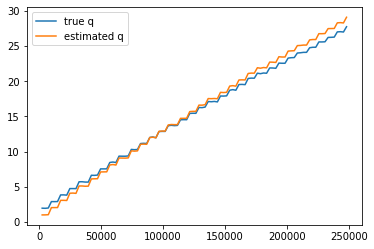

In [ ]:
import pandas as pd
true_q = pd.read_csv("/content/d3rlpy_logs/CQL_cartpole/true_q.csv",header=None)
estimated_q = pd.read_csv("/content/d3rlpy_logs/CQL_cartpole/estimated_q.csv",header=None)

true_q.columns = ["0", "training steps", "true q"]
estimated_q.columns = ["0", "training steps", "estimated q"]

plt.plot(true_q['training steps'],true_q['true q'])
plt.plot(estimated_q['training steps'],estimated_q['estimated q'])
plt.legend(['true q','estimated q'])

In [ ]:
from d3rlpy.ope import FQE,DiscreteFQE

shutil.rmtree('/content/d3rlpy_logs/FQE_cartpole', ignore_errors=True)

fqe = DiscreteFQE(algo=cql)
result = fqe.fit(train_episodes,
   eval_episodes=test_episodes,
   n_epochs=10,
   scorers={
       "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer

   },
   with_timestamp=False,
   experiment_name=f"FQE_cartpole")

2022-11-03 23:59.41 [debug    ] RoundIterator is selected.
2022-11-03 23:59.41 [info     ] Directory is created at d3rlpy_logs/FQE_cartpole
2022-11-03 23:59.41 [debug    ] Building models...
2022-11-03 23:59.41 [debug    ] Models have been built.
2022-11-03 23:59.41 [info     ] Parameters are saved to d3rlpy_logs/FQE_cartpole/params.json params={'action_scaler': None, 'batch_size': 100, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 100, 'use_gpu': None, 'algorithm': 'DiscreteFQE', 'observation_shape': (4,), 'action_size': 2}


Epoch 1/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-03 23:59.46 [info     ] FQE_cartpole: epoch=1 step=794 epoch=1 metrics={'time_sample_batch': 0.0003436002082728619, 'time_algorithm_update': 0.004465746639357406, 'loss': 0.11182634816716146, 'time_step': 0.004944998911706266, 'estimated_q': 7.292426586151123, 'true_q': 7.719873905181885} step=794
2022-11-03 23:59.46 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_794.pt


Epoch 2/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-03 23:59.50 [info     ] FQE_cartpole: epoch=2 step=1588 epoch=2 metrics={'time_sample_batch': 0.0003324389757977925, 'time_algorithm_update': 0.004308293388232176, 'loss': 0.17796845415120907, 'time_step': 0.004764088455315501, 'estimated_q': 14.403406143188477, 'true_q': 14.261752128601074} step=1588
2022-11-03 23:59.50 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_1588.pt


Epoch 3/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-03 23:59.55 [info     ] FQE_cartpole: epoch=3 step=2382 epoch=3 metrics={'time_sample_batch': 0.0003589679972651023, 'time_algorithm_update': 0.0046850502941410245, 'loss': 0.2693115268729543, 'time_step': 0.005172246649523526, 'estimated_q': 21.044618606567383, 'true_q': 20.363784790039062} step=2382
2022-11-03 23:59.55 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_2382.pt


Epoch 4/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.00 [info     ] FQE_cartpole: epoch=4 step=3176 epoch=4 metrics={'time_sample_batch': 0.0003360660010080794, 'time_algorithm_update': 0.004456591846360367, 'loss': 0.3570540289486048, 'time_step': 0.004925432073079068, 'estimated_q': 27.12874984741211, 'true_q': 25.946910858154297} step=3176
2022-11-04 00:00.00 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_3176.pt


Epoch 5/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.11 [info     ] FQE_cartpole: epoch=5 step=3970 epoch=5 metrics={'time_sample_batch': 0.0007605390524684032, 'time_algorithm_update': 0.009907568732196798, 'loss': 0.43701427880151467, 'time_step': 0.011053242671399633, 'estimated_q': 32.8020133972168, 'true_q': 31.166208267211914} step=3970
2022-11-04 00:00.11 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_3970.pt


Epoch 6/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.18 [info     ] FQE_cartpole: epoch=6 step=4764 epoch=6 metrics={'time_sample_batch': 0.0004120071228565437, 'time_algorithm_update': 0.006186279001404116, 'loss': 0.5120360414440079, 'time_step': 0.006878854345614724, 'estimated_q': 37.97782516479492, 'true_q': 35.92811965942383} step=4764
2022-11-04 00:00.18 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_4764.pt


Epoch 7/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.24 [info     ] FQE_cartpole: epoch=7 step=5558 epoch=7 metrics={'time_sample_batch': 0.0004454673988092456, 'time_algorithm_update': 0.005862454623359277, 'loss': 0.5817960716411003, 'time_step': 0.00656593266302152, 'estimated_q': 42.8455810546875, 'true_q': 40.40108871459961} step=5558
2022-11-04 00:00.24 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_5558.pt


Epoch 8/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.31 [info     ] FQE_cartpole: epoch=8 step=6352 epoch=8 metrics={'time_sample_batch': 0.00041375982971575756, 'time_algorithm_update': 0.0058710689208369415, 'loss': 0.6456342185859191, 'time_step': 0.0065362888859861745, 'estimated_q': 47.33148956298828, 'true_q': 44.519187927246094} step=6352
2022-11-04 00:00.31 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_6352.pt


Epoch 9/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.37 [info     ] FQE_cartpole: epoch=9 step=7146 epoch=9 metrics={'time_sample_batch': 0.0004479795018731797, 'time_algorithm_update': 0.005694130806238285, 'loss': 0.7065062870527207, 'time_step': 0.0063601486028291715, 'estimated_q': 51.56062316894531, 'true_q': 48.40351104736328} step=7146
2022-11-04 00:00.37 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_7146.pt


Epoch 10/10:   0%|          | 0/794 [00:00<?, ?it/s]

2022-11-04 00:00.43 [info     ] FQE_cartpole: epoch=10 step=7940 epoch=10 metrics={'time_sample_batch': 0.0003863386903661925, 'time_algorithm_update': 0.0053883421631243725, 'loss': 0.7601003288660874, 'time_step': 0.005995811983680244, 'estimated_q': 55.271602630615234, 'true_q': 51.81338119506836} step=7940
2022-11-04 00:00.43 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_7940.pt


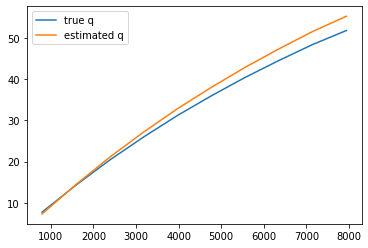

In [ ]:
fqe_true_q = pd.read_csv("/content/d3rlpy_logs/FQE_cartpole/true_q.csv",header=None)
fqe_estimated_q = pd.read_csv("/content/d3rlpy_logs/FQE_cartpole/estimated_q.csv",header=None)

fqe_true_q.columns = ["0", "training steps", "true q"]
fqe_estimated_q.columns = ["0", "training steps", "estimated q"]

plt.plot(fqe_true_q['training steps'],fqe_true_q['true q'])
plt.plot(fqe_estimated_q['training steps'],fqe_estimated_q['estimated q'])
plt.legend(['true q','estimated q'])